In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
human_data = pd.read_table('human.txt')
human_data.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


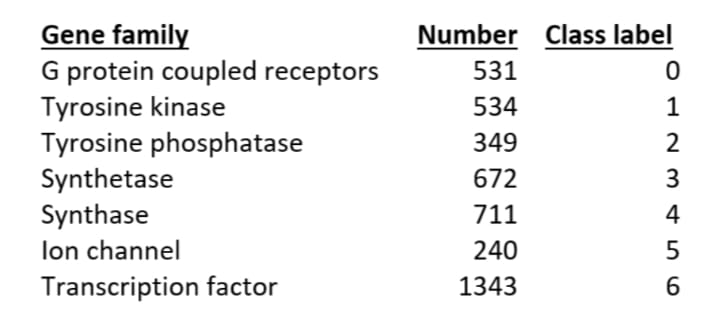

In [3]:
from IPython.display import Image
Image("dnaclass.jpeg")

In [4]:
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence)-size+1)]

In [5]:
human_data['words']=human_data.apply(lambda x: getKmers(x['sequence']),axis=1)
human_data=human_data.drop('sequence',axis=1)

In [6]:
human_data.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [7]:
human_texts=list(human_data['words'])
for item in range(len(human_texts)):
    human_texts[item]=' '.join(human_texts[item])
y_data=human_data.iloc[:, 0].values

In [8]:
print(human_texts[0])

atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatact atacta tactac actacc ctaccg taccgt accgta ccgtat cgtatg gtatgg tatggc atggcc tggccc ggccca gcccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctt tcctta ccttac cttaca ttacac tacact acacta cactat actatt ctattc tattcc attcct ttcctc tcctca cctcat ctcatc tcatca catcac atcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaac taaaca aaacac aacaca acacaa cacaaa acaaac caaact aaacta aactac actacc ctacca taccac accacc ccacct caccta acctac cctacc ctacct tacctc acctcc cctccc ctccct tccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaag caaagc aaagcc aagccc agccca gcccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaat aaaatt aaatta aattat attata ttataa tataac ataaca taacaa aacaaa acaaac

In [9]:
y_data

array([4, 4, 3, ..., 6, 6, 6], dtype=int64)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(4,4))
X=cv.fit_transform(human_texts)

In [11]:
print(X.shape)

(4380, 232414)


In [12]:
X

<4380x232414 sparse matrix of type '<class 'numpy.int64'>'
	with 5406441 stored elements in Compressed Sparse Row format>

<Axes: >

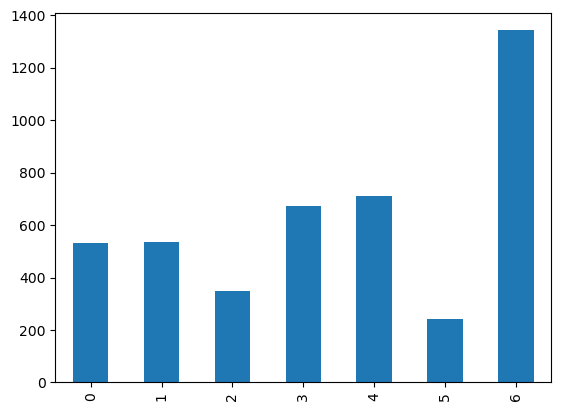

In [13]:
human_data['class'].value_counts().sort_index().plot.bar()

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size = 0.20, random_state=42)

In [15]:
print(X_train.shape)
print(X_test.shape)

(3504, 232414)
(876, 232414)


In [16]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB(alpha=0.2)
classifier.fit(X_train,y_train)

MultinomialNB(alpha=0.2)

In [17]:
y_pred=classifier.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion Matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f"%(accuracy,precision,recall,f1))

Confusion Matrix

Predicted    0    1   2    3    4   5    6
Actual                                    
0          100    0   0    0    1   0    1
1            0  104   0    0    0   0    2
2            0    0  78    0    0   0    0
3            0    0   0  124    1   0    0
4            1    0   0    0  145   0    3
5            0    0   0    0    0  51    0
6            1    0   0    1    0   0  263
accuracy = 0.987 
precision = 0.988 
recall = 0.987 
f1 = 0.987


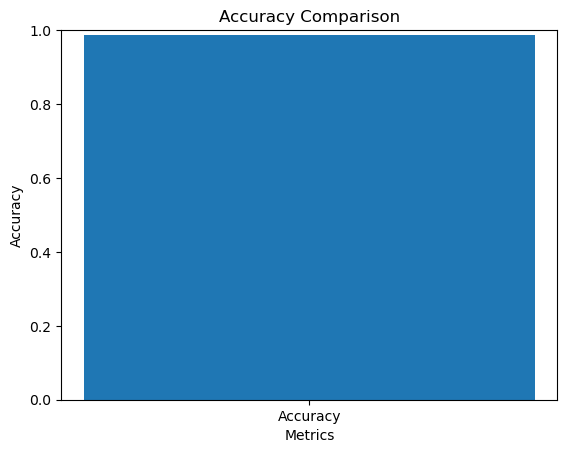

In [19]:
import matplotlib.pyplot as plt

accuracy_values = [accuracy]
labels = ['Accuracy']

plt.bar(labels, accuracy_values)
plt.xlabel('Metrics')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim([0, 1])  # Set the y-axis limits between 0 and 1
plt.show()

In [20]:
dna_df = pd.read_csv('password1_dataframe.csv')
dna_df.head()

,Password,DNA
0,panda,TGTTCGACTTGAATGGTACAGAAT
1,Horny,TAATGATTTGATAATAAAGAGGGT
2,bbbb,TGGAGGCATGCCACGCAG
3,spike,TGGAGGATTTACCACCAGAGGTCT
4,drum,TCAAAGCCAACCTTCCTT


In [21]:
len(dna_df)

1000

In [22]:
listex = list(dna_df.iloc[:,1])
listex2 = list(dna_df.iloc[:,0])

In [23]:
#A=00 T=01 G=10 C=11
def replace_with_binary_list(string_list):
    binary_list = []
    for text in string_list:
        binary_text = ""
        for char in text:
            if char.isalpha():
                if char == "A":
                    binary_text += "00"
                elif char == "T":
                    binary_text += "01"
                elif char == "G":
                    binary_text += "10"
                elif char == "C":
                    binary_text += "11"
            else:
                binary_text += char
        binary_list.append(binary_text)
    return binary_list

In [24]:
item=replace_with_binary_list(listex)

In [25]:
item[0]

'011001011110001101011000000110100100110010000001'

In [26]:
integer_list = [int(binary, 2) for binary in item]
integer_list[0]

112027110100097

In [27]:
def replace_with_ascii_list(string_list):
    ascii_list = []
    for text in string_list:
        ascii_text = ""
        for char in text:
            if char.isalpha() or not char.isdigit():
                ascii_value = str(ord(char)).zfill(3)
                ascii_text += ascii_value
        ascii_list.append(ascii_text)
    return ascii_list

In [28]:
item3=replace_with_ascii_list(listex2)

In [29]:
item3[0]

'112097110100097'

In [30]:
def convert_to_int_list(string_list):
    int_list = []
    for text in string_list:
        try:
            converted_value = int(text)
            int_list.append(converted_value)
        except ValueError:
            int_list.append(0) 
    return int_list

In [31]:
b2=convert_to_int_list(item3)
b2[0]

112097110100097

In [32]:
float_decimal_list = [float(num) for num in integer_list]
float_updated_list = [float(num) for num in b2]

In [33]:
is_inf_decimal_list = np.isinf(float_decimal_list)
if np.any(is_inf_decimal_list):
    print("Infinity values found in float_decimal_list.")

is_inf_updated_list = np.isinf(float_updated_list)
if np.any(is_inf_updated_list):
    print("Infinity values found in float_updated_list.")

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
feature1_scaled = scaler.fit_transform(np.array(float_updated_list).reshape(-1, 1))
feature2_scaled = scaler.fit_transform(np.array(float_decimal_list).reshape(-1, 1))

In [35]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(feature1_scaled, feature2_scaled)

# Calculate R-squared score
r2_score = regression_model.score(feature1_scaled, feature2_scaled)
print("R-squared score:", r2_score)

R-squared score: 0.9999999981902419


In [36]:
from sklearn.metrics import mean_squared_error
import math

# Make predictions
predicted_values = regression_model.predict(feature1_scaled)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(feature2_scaled, predicted_values)

# Calculate Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 1.8097580792084726e-09
Root Mean Squared Error (RMSE): 4.254125150026116e-05


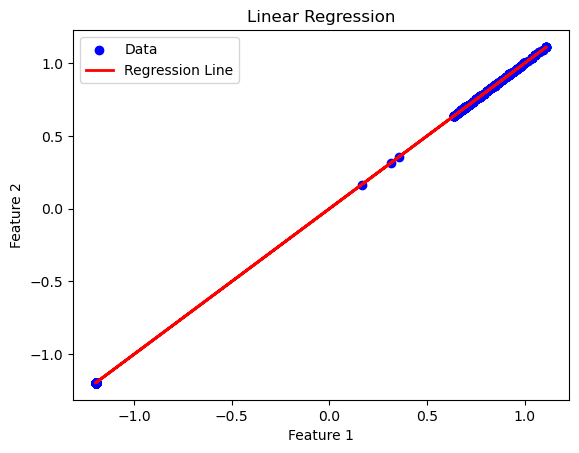

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Plot scatter plot
plt.scatter(feature1_scaled, feature2_scaled, color='blue', label='Data')

# Predict using the trained regression model
predicted_feature2 = regression_model.predict(feature1_scaled)

# Plot regression line
plt.plot(feature1_scaled, predicted_feature2, color='red', linewidth=2, label='Regression Line')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [38]:
coefficients = regression_model.coef_
intercepts = regression_model.intercept_
print("Coefficient:", coefficients)
print("\nIntercept:", intercepts)

Coefficient: [[1.]]

Intercept: [2.18491891e-16]


In [39]:
def my_A(text):
    ascii_text = ""
    for char in text:
        ascii_value = str(ord(char)).zfill(3)
        ascii_text += ascii_value
    return ascii_text

def predict(p_data):
    pred_value = regression_model.predict(p_data)
    return pred_value

def from_ascii_list(ascii_list):
    string_text = ""
    for ascii_value in ascii_list:
        char = chr(ascii_value)
        string_text += char
    return string_text

def replace_with_dna(text): 
    dna_text = ""
    i = 0
    while i < len(text):
        chunk = text[i:i+2]
        if chunk == "00":
            dna_text += "A"
        elif chunk == "01":
            dna_text += "T"
        elif chunk == "10":
            dna_text += "G"
        elif chunk == "11":
            dna_text += "C"
        i += 2
    return dna_text

def vectorize_s(mydna):
    dna_texts = getKmers(mydna)
    hdna_texts = ' '.join(dna_texts)
    Xz = cv.transform([hdna_texts])
    return Xz

def encrypt_password(password_list):
    new_list = []
    for password in password_list:
        ascii_text = my_A(password)
        ascii_text = int(ascii_text)
        ascii_text = np.array(ascii_text).reshape(-1, 1)# Convert to 2D array

        predicted_y = predict(ascii_text)
        predicted_scalar = predicted_y.item()  # Get scalar value from NumPy array

        number_str = str(predicted_scalar)
        float_number = float(number_str)
        integer_number = int(float_number)

        bin_number = bin(integer_number)[2:]

        if len(bin_number) % 2 != 0:
            bin_number = "0" + bin_number

        dna_code = replace_with_dna(bin_number)
        vector_ = vectorize_s(dna_code)
        class_pred = classifier.predict(vector_)
        class_label = str(class_pred)
        new_list.append(dna_code)

    return new_list
    
import math
import decimal

def decrypt_dna(new_list):
    some_list = []
    for dna_code in new_list:
        binary_text = ""
        for char in dna_code:
            if char == "A":
                binary_text += "00"
            elif char == "T":
                binary_text += "01"
            elif char == "G":
                binary_text += "10"
            elif char == "C":
                binary_text += "11"
    
        integer_number = int(binary_text, 2)
        decimal.getcontext().prec = 100  # Set the precision
        decimal_number = decimal.Decimal(integer_number)
        coef_decimal = decimal.Decimal(regression_model.coef_.item())
        intercept_decimal = decimal.Decimal(regression_model.intercept_.item())
        inp_decimal = (decimal_number - intercept_decimal) / coef_decimal
        inp_decimal = math.ceil(inp_decimal)
    
        ascii_text = str(inp_decimal)
        # Pad the string with leading zeros if needed
        while len(ascii_text) % 3 != 0:
            ascii_text = '0' + ascii_text

        # Split the string into groups of three digits and reverse each group
        reversed_str = ascii_text[::-1]

        # Pad the string with leading zeros if the length is not divisible by 3
        while len(reversed_str) % 3 != 0:
            reversed_str += '0'

        # Split the string into groups of three digits and reverse each group
        groups = [int(reversed_str[i:i+3][::-1]) for i in range(0, len(reversed_str), 3)]

        groups.reverse()
        original_text = from_ascii_list(groups)
        some_list.append(original_text)
    return some_list

In [40]:
free_list = encrypt_password(listex2)

In [41]:
c=0
free1_list = decrypt_dna(free_list)
for i in range(len(listex2)):
    if listex2[i] == free1_list[i]:
        c = c + 1
print("Accuracy of decryption: ",c/10,"%")

Accuracy of decryption:  99.8 %


In [42]:
import tkinter as tk

def my_A(text):
    ascii_text = ""
    for char in text:
        ascii_value = str(ord(char)).zfill(3)
        ascii_text += ascii_value
    return ascii_text

def predict(p_data):
    pred_value = regression_model.predict(p_data)
    return pred_value

def from_ascii_list(ascii_list):
    string_text = ""
    for ascii_value in ascii_list:
        char = chr(ascii_value)
        string_text += char
    return string_text

def replace_with_dna(text): 
    dna_text = ""
    i = 0
    while i < len(text):
        chunk = text[i:i+2]
        if chunk == "00":
            dna_text += "A"
        elif chunk == "01":
            dna_text += "T"
        elif chunk == "10":
            dna_text += "G"
        elif chunk == "11":
            dna_text += "C"
        i += 2
    return dna_text

def vectorize_s(mydna):
    dna_texts = getKmers(mydna)
    hdna_texts = ' '.join(dna_texts)
    Xz = cv.transform([hdna_texts])
    return Xz

def encrypt_password():
    password = password_entry.get()
    ascii_text = my_A(password)
    ascii_text = int(ascii_text)
    ascii_text = np.array(ascii_text).reshape(-1, 1)# Convert to 2D array

    predicted_y = predict(ascii_text)
    predicted_scalar = predicted_y.item()  # Get scalar value from NumPy array

    number_str = str(predicted_scalar)
    float_number = float(number_str)
    integer_number = int(float_number)

    bin_number = bin(integer_number)[2:]

    if len(bin_number) % 2 != 0:
        bin_number = "0" + bin_number

    dna_code = replace_with_dna(bin_number)
    vector_ = vectorize_s(dna_code)
    class_pred = classifier.predict(vector_)
    class_label = str(class_pred)

    dna_label.config(text="Your encrypted DNA code: " + dna_code + "\nFamily Number:" + class_label)
    
import math
import decimal

def decrypt_dna():
    dna_code = dna_label.cget("text").split(": ")[1].split("\n")[0]
    binary_text = ""
    for char in dna_code:
        if char == "A":
            binary_text += "00"
        elif char == "T":
            binary_text += "01"
        elif char == "G":
            binary_text += "10"
        elif char == "C":
            binary_text += "11"
    
    integer_number = int(binary_text, 2)
    decimal.getcontext().prec = 100  # Set the precision
    decimal_number = decimal.Decimal(integer_number)
    coef_decimal = decimal.Decimal(regression_model.coef_.item())
    intercept_decimal = decimal.Decimal(regression_model.intercept_.item())
    inp_decimal = (decimal_number - intercept_decimal) / coef_decimal
    inp_decimal = math.ceil(inp_decimal)
    
    ascii_text = str(inp_decimal)
    
    # Pad the string with leading zeros if needed
    while len(ascii_text) % 3 != 0:
        ascii_text = '0' + ascii_text

    # Split the string into groups of three digits and reverse each group
    reversed_str = ascii_text[::-1]

    # Pad the string with leading zeros if the length is not divisible by 3
    while len(reversed_str) % 3 != 0:
        reversed_str += '0'

    # Split the string into groups of three digits and reverse each group
    groups = [int(reversed_str[i:i+3][::-1]) for i in range(0, len(reversed_str), 3)]

    groups.reverse()
    
    original_text = from_ascii_list(groups)
    
    password_label.config(text="Your decrypted password: " + original_text)
    
window = tk.Tk()
window.title("DNA Encryption")
window.geometry("400x200")

label = tk.Label(window, text="Enter password:")
label.pack(pady=10)

password_entry = tk.Entry(window, show="*")
password_entry.pack()

encrypt_button = tk.Button(window, text="Encrypt and Predict Class", command=encrypt_password)
encrypt_button.pack(pady=10)

dna_label = tk.Label(window, text="")
dna_label.pack()

show_button = tk.Button(window, text="Decrypt Sequence", command=decrypt_dna)
show_button.pack(pady=10)

password_label = tk.Label(window, text="")
password_label.pack()

window.mainloop()

In [43]:
datag = pd.read_csv('dna1_dataframe.csv')

In [44]:
len(datag)

6663

In [45]:
listex4 = list(datag.iloc[:,1])
listex3 = list(datag.iloc[:,0])
listex3[0]

'123456'

In [46]:
totem=replace_with_binary_list(listex4)
totem[0]

'010010111010001101110001001010011111'

In [47]:
integ_list = [int(binary, 2) for binary in totem]
integ_list[0]

20304040607

In [48]:
def custom_encoding(character):
    if character.isdigit():
        return str(int(character) + 1).zfill(2)
    elif 'a' <= character <= 'z':
        return str(ord(character) - ord('a') + 11)
    elif 'A' <= character <= 'Z':
        return str(ord(character) - ord('A') + 37)
    elif character in '~!@#$%^&*()-_+={}[]\\|:;\"\'<>,./?`':
        special_chars = '~!@#$%^&*()-_+={}[]\\|:;\"\'<>,./?`'
        return str(special_chars.index(character) + 63)
    else:
        return None

In [49]:
def encode_strings(string_list):
    encoded_list = []
    for i in string_list:
        enc = ''.join(custom_encoding(char) for char in i)
        encoded_list.append(enc)
    return encoded_list

In [50]:
totem3=encode_strings(listex3)
totem3[0]

'020304050607'

In [51]:
b4=convert_to_int_list(totem3)
b4[0]

20304050607

In [52]:
fl_decimal_list = [float(num) for num in integ_list]
fl_updated_list = [float(num) for num in b4]

In [53]:
inf_decimal_list = np.isinf(fl_decimal_list)
if np.any(inf_decimal_list):
    print("Infinity values found in fl_decimal_list.")

inf_updated_list = np.isinf(fl_updated_list)
if np.any(inf_updated_list):
    print("Infinity values found in fl_updated_list.")

In [54]:
scaler1 = StandardScaler()
feat1_scaled = scaler1.fit_transform(np.array(fl_updated_list).reshape(-1, 1))
feat2_scaled = scaler1.fit_transform(np.array(fl_decimal_list).reshape(-1, 1))

In [55]:
regression_model1 = LinearRegression()
regression_model1.fit(feat1_scaled, feat2_scaled)

LinearRegression()

In [56]:
coefficients1 = regression_model1.coef_
intercepts1 = regression_model1.intercept_
print("Coefficient:", coefficients1)
print("\nIntercept:", intercepts1)

Coefficient: [[1.]]

Intercept: [6.16297582e-33]


In [57]:
def custom_encoding(character):
    if character.isdigit():
        return str(int(character) + 1).zfill(2)
    elif 'a' <= character <= 'z':
        return str(ord(character) - ord('a') + 11)
    elif 'A' <= character <= 'Z':
        return str(ord(character) - ord('A') + 37)
    elif character in '~!@#$%^&*()-_+={}[]\\|:;\"\'<>,./?`':
        special_chars = '~!@#$%^&*()-_+={}[]\\|:;\"\'<>,./?`'
        return str(special_chars.index(character) + 63)
    else:
        return None

def custom_decoding(encoding):
    encoding = int(encoding)
    if 1 <= encoding <= 10:
        return str(encoding - 1)
    elif 11 <= encoding <= 36:
        return chr(encoding - 11 + ord('a'))
    elif 37 <= encoding <= 62:
        return chr(encoding - 37 + ord('A'))
    elif 63 <= encoding <= 94:
        special_chars = '~!@#$%^&*()-_+={}[]\\|:;\"\'<>,./?`'
        return special_chars[encoding - 63]
    else:
        return ''
    
def decode_text(encoded_text):
    decoded_text = ''.join(custom_decoding(encoded_text[i:i+2]) for i in range(0, len(encoded_text), 2))
    return decoded_text

def my_A(text):
    ascii_text = ""
    encoded_text = ''.join(custom_encoding(char) for char in text)
    return encoded_text

def predict(p_data):
    pred_value = regression_model1.predict(p_data)
    return pred_value

def replace_with_dna(text): 
    dna_text = ""
    i = 0
    while i < len(text):
        chunk = text[i:i+2]
        if chunk == "00":
            dna_text += "A"
        elif chunk == "01":
            dna_text += "T"
        elif chunk == "10":
            dna_text += "G"
        elif chunk == "11":
            dna_text += "C"
        i += 2
    return dna_text

def encrypt_password(password_list):
    new_list = []
    for password in password_list:
        ascii_text = my_A(password)
        ascii_text = int(ascii_text)
        ascii_text = np.array(ascii_text).reshape(-1, 1)# Convert to 2D array

        predicted_y = predict(ascii_text)
        predicted_scalar = predicted_y.item()  # Get scalar value from NumPy array

        number_str = str(predicted_scalar)
        float_number = float(number_str)
        integer_number = int(float_number)

        bin_number = bin(integer_number)[2:]

        if len(bin_number) % 2 != 0:
            bin_number = "0" + bin_number

        dna_code = replace_with_dna(bin_number)
        new_list.append(dna_code)

    return new_list
    
import math
import decimal

def decrypt_dna(new_list):
    some_list = []
    for dna_code in new_list:
        binary_text = ""
        for char in dna_code:
            if char == "A":
                binary_text += "00"
            elif char == "T":
                binary_text += "01"
            elif char == "G":
                binary_text += "10"
            elif char == "C":
                binary_text += "11"
    
        integer_number = int(binary_text, 2)
        decimal.getcontext().prec = 100  # Set the precision
        decimal_number = decimal.Decimal(integer_number)
        coef_decimal = decimal.Decimal(regression_model1.coef_.item())
        intercept_decimal = decimal.Decimal(regression_model1.intercept_.item())
        inp_decimal = (decimal_number - intercept_decimal) / coef_decimal
        inp_decimal = math.ceil(inp_decimal)
    
        ascii_text = str(inp_decimal)
        original_text = decode_text(ascii_text)
        some_list.append(original_text)
    return some_list

In [58]:
free_list1 = encrypt_password(listex3)

In [59]:
c=0
free2_list = decrypt_dna(free_list1)
for i in range(len(listex3)):
    if listex3[i] == free2_list[i]:
        c = c + 1
print("Accuracy: ", c/len(datag) * 100, "%")

Accuracy:  90.75491520336185 %


In [60]:
import tkinter as tk

def custom_encoding(character):
    if character.isdigit():
        return str(int(character) + 1).zfill(2)
    elif 'a' <= character <= 'z':
        return str(ord(character) - ord('a') + 11)
    elif 'A' <= character <= 'Z':
        return str(ord(character) - ord('A') + 37)
    elif character in '~!@#$%^&*()-_+={}[]\\|:;\"\'<>,./?`':
        special_chars = '~!@#$%^&*()-_+={}[]\\|:;\"\'<>,./?`'
        return str(special_chars.index(character) + 63)
    else:
        return None

def custom_decoding(encoding):
    encoding = int(encoding)
    if 1 <= encoding <= 10:
        return str(encoding - 1)
    elif 11 <= encoding <= 36:
        return chr(encoding - 11 + ord('a'))
    elif 37 <= encoding <= 62:
        return chr(encoding - 37 + ord('A'))
    elif 63 <= encoding <= 94:
        special_chars = '~!@#$%^&*()-_+={}[]\\|:;\"\'<>,./?`'
        return special_chars[encoding - 63]
    else:
        return ''
    
def decode_text(encoded_text):
    decoded_text = ''.join(custom_decoding(encoded_text[i:i+2]) for i in range(0, len(encoded_text), 2))
    return decoded_text

def my_A(text):
    ascii_text = ""
    encoded_text = ''.join(custom_encoding(char) for char in text)
    return encoded_text

def predict(p_data):
    pred_value = regression_model1.predict(p_data)
    return pred_value

def vectorize_s(mydna):
    dna_texts = getKmers(mydna)
    hdna_texts = ' '.join(dna_texts)
    Xz = cv.transform([hdna_texts])
    return Xz

def replace_with_dna(text): 
    dna_text = ""
    i = 0
    while i < len(text):
        chunk = text[i:i+2]
        if chunk == "00":
            dna_text += "A"
        elif chunk == "01":
            dna_text += "T"
        elif chunk == "10":
            dna_text += "G"
        elif chunk == "11":
            dna_text += "C"
        i += 2
    return dna_text

def encrypt_password():
    password = password_entry.get()
    ascii_text = my_A(password)
    ascii_text = int(ascii_text)
    ascii_text = np.array(ascii_text).reshape(-1, 1)# Convert to 2D array

    predicted_y = predict(ascii_text)
    predicted_scalar = predicted_y.item()  # Get scalar value from NumPy array

    number_str = str(predicted_scalar)
    float_number = float(number_str)
    integer_number = int(float_number)

    bin_number = bin(integer_number)[2:]

    if len(bin_number) % 2 != 0:
        bin_number = "0" + bin_number

    dna_code = replace_with_dna(bin_number)
    vector_ = vectorize_s(dna_code)
    class_pred = classifier.predict(vector_)
    class_label = str(class_pred)
    dna_label.config(text="Your encrypted DNA code: " + dna_code + "\nSequence belongs to family: " + class_label)
    
import math
import decimal

def decrypt_dna():
    dna_code = dna_label.cget("text").split(": ")[1].split("\n")[0]
    binary_text = ""
    for char in dna_code:
        if char == "A":
            binary_text += "00"
        elif char == "T":
            binary_text += "01"
        elif char == "G":
            binary_text += "10"
        elif char == "C":
            binary_text += "11"
    
    integer_number = int(binary_text, 2)
    decimal.getcontext().prec = 100  # Set the precision
    decimal_number = decimal.Decimal(integer_number)
    coef_decimal = decimal.Decimal(regression_model1.coef_.item())
    intercept_decimal = decimal.Decimal(regression_model.intercept_.item())
    inp_decimal = (decimal_number - intercept_decimal) / coef_decimal
    inp_decimal = math.ceil(inp_decimal)
    
    ascii_text = str(inp_decimal)
    original_text = decode_text(ascii_text)
    password_label.config(text="Your decrypted password: " + original_text)

window = tk.Tk()
window.title("DNA Encryption")
window.geometry("400x200")

label = tk.Label(window, text="Enter password of length <= 7 char :")
label.pack(pady=10)

password_entry = tk.Entry(window, show="*")
password_entry.pack()

encrypt_button = tk.Button(window, text="Encrypt Password and Find it's family", command=encrypt_password)
encrypt_button.pack(pady=10)

dna_label = tk.Label(window, text="")
dna_label.pack()

show_button = tk.Button(window, text="Decrypt Sequence", command=decrypt_dna)
show_button.pack(pady=10)

password_label = tk.Label(window, text="")
password_label.pack()

window.mainloop()

In [61]:
import tkinter as tk
from tkinter import messagebox
from tkinter.font import Font

def login():
    password = password_entry.get()
    family_number = number_entry.get()

    if password == "rook1@_" and family_number == "5":
        messagebox.showinfo("Success", "Welcome!")
    elif password != "rook1@_" and family_number == "5":
        messagebox.showerror("Error", "Incorrect password!")
    elif password == "rook1@_" and family_number != "5":
        messagebox.showerror("Error", "Incorrect family number!")
    else:
        messagebox.showerror("Error", "Incorrect password and family number!")

root = tk.Tk()
root.title("Family Group")
root.geometry("300x200")

bold_font = Font(family="Helvetica", size=12, weight="bold")

bold_label = tk.Label(root, text="Group ABC", font=bold_font)
bold_label.pack(pady=10)

# Create the note label
note_label = tk.Label(root, text="To enter, please enter password and family number.")
note_label.pack()

# Create the password label and entry field
password_label = tk.Label(root, text="Password:")
password_label.pack(pady=5)
password_entry = tk.Entry(root, show="*")  # Show asterisks instead of plain text
password_entry.pack()

# Create the number label and entry field
number_label = tk.Label(root, text="Number:")
number_label.pack(pady=5)
number_entry = tk.Entry(root)
number_entry.pack()

login_button = tk.Button(root, text="Login", command=login)
login_button.pack(pady=10)

root.mainloop()

In [62]:
human_data1 = pd.read_table('human.txt')
human_data1.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [63]:
listz=list(human_data1.iloc[:1000,0])
len(listz)

1000

In [64]:
import base64
import random
import string

def encode_dna_sequences(dna_sequences):
    encoded_passwords = []
    
    for dna_sequence in dna_sequences:
        # Encode DNA sequence using Base64
        encoded_string = base64.b64encode(dna_sequence.encode('utf-8')).decode('utf-8')
        
        # Generate a random password of length between 10 and 15
        password_length = random.randint(10, 15)
        password = ''.join(random.choices(string.ascii_letters + string.digits, k=password_length))
        
        # Append the encoded string-password pair to the list
        encoded_passwords.append((encoded_string, password))
    
    return encoded_passwords

def decode_passwords(encoded_passwords):
    decoded_sequences = []
    
    for encoded_password, _ in encoded_passwords:
        # Decode the Base64 string to retrieve the original DNA sequence
        decoded_sequence = base64.b64decode(encoded_password).decode('utf-8')
        
        # Append the decoded DNA sequence to the list
        decoded_sequences.append(decoded_sequence)
    
    return decoded_sequences

# Generate a sample DNA sequence dataset
dna_sequences = listz  # Replace with your actual DNA sequences

# Encode DNA sequences into passwords
encoded_passwords = encode_dna_sequences(dna_sequences)
decoded = decode_passwords(encoded_passwords)

print(encoded_passwords[0])

print(decoded[0])

('QVRHQ0NDQ0FBQ1RBQUFUQUNUQUNDR1RBVEdHQ0NDQUNDQVRBQVRUQUNDQ0NDQVRBQ1RDQ1RUQUNBQ1RBVFRDQ1RDQVRDQUNDQ0FBQ1RBQUFBQVRBVFRBQUFDQUNBQUFDVEFDQ0FDQ1RBQ0NUQ0NDVENBQ0NBQUFHQ0NDQVRBQUFBQVRBQUFBQUFUVEFUQUFDQUFBQ0NDVEdBR0FBQ0NBQUFBVEdBQUNHQUFBQVRDVEdUVENHQ1RUQ0FUVENBVFRHQ0NDQ0NBQ0FBVENDVEFH', 'wn8Tj5SytfM')
ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG


In [65]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Preprocessing
passwords = [password for encoded_password, password in encoded_passwords]
cleaned_passwords = ["".join(filter(str.isalpha, password)) for password in passwords]

# Convert characters to unique integers
password_tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level=True)
password_tokenizer.fit_on_texts(cleaned_passwords)
password_sequences = password_tokenizer.texts_to_sequences(cleaned_passwords)

sequence_tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level=True)
sequence_tokenizer.fit_on_texts(dna_sequences)
sequence_sequences = sequence_tokenizer.texts_to_sequences(dna_sequences)

# Pad sequences to have equal length
max_password_length = max(len(seq) for seq in password_sequences)
max_sequence_length = max(len(seq) for seq in sequence_sequences)

password_sequences = tf.keras.preprocessing.sequence.pad_sequences(password_sequences, maxlen=max_password_length)
sequence_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequence_sequences, maxlen=max_sequence_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(password_sequences, sequence_sequences, test_size=0.2, random_state=42)

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(password_tokenizer.word_index) + 1, 100, input_length=max_password_length),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.RepeatVector(max_sequence_length),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Dense(len(sequence_tokenizer.word_index) + 1, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

Epoch 1/3
25/25 [==============================] - 1633s 66s/step - loss: 0.9900 - accuracy: 0.8012 - val_loss: 0.7293 - val_accuracy: 0.8211
Epoch 2/3
25/25 [==============================] - 873s 35s/step - loss: 0.6900 - accuracy: 0.8328 - val_loss: 0.7198 - val_accuracy: 0.8211
Epoch 3/3
7/7 [==============================] - 25s 4s/step - loss: 0.7184 - accuracy: 0.8211
Accuracy: 0.8211365342140198


Epoch 1/3
25/25 [==============================] - 1953s 77s/step - loss: 0.6860 - accuracy: 0.8328 - val_loss: 0.7178 - val_accuracy: 0.8211
Epoch 2/3
25/25 [==============================] - 1108s 45s/step - loss: 0.6840 - accuracy: 0.8328 - val_loss: 0.7176 - val_accuracy: 0.8211
Epoch 3/3
25/25 [==============================] - 1006s 40s/step - loss: 0.6849 - accuracy: 0.8328 - val_loss: 0.7195 - val_accuracy: 0.8211


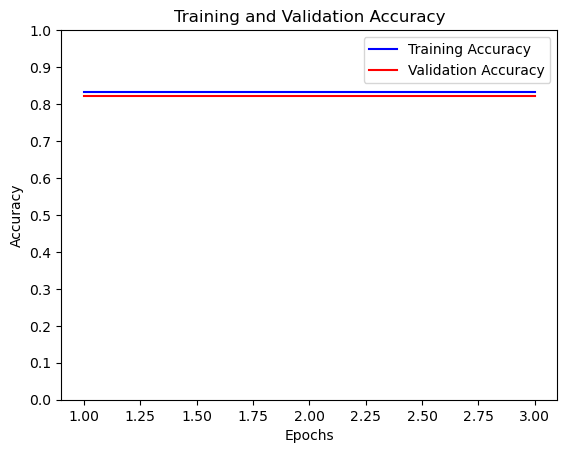

In [66]:
import matplotlib.pyplot as plt

# Train the model and store the training/validation accuracy history
history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test))

# Get the accuracy values from the history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot the accuracy graph
epochs = range(1, len(training_accuracy) + 1)
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.yticks([i/10 for i in range(11)])
plt.show()